<a href="https://colab.research.google.com/github/Ali478/PCA-Implementation/blob/main/PCA_on_Digit_Reconginer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

In [ ]:
# Reading the folder architecture of Kaggle to get the dataset path.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [ ]:
# Reading the Train and Test Datasets.
mnist_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
mnist_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [ ]:
#Checking first 5 rows to see dataset
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# basic statistical insights of the numerical features of train data.
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
#to check the empty fields in data,as it is false so there is no empty field in data
mnist_train.isna().any().any()

False

In [ ]:
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

# Normalizing the images.
mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

### Visulaize a single digit with an array

IMAGE LABEL: 4


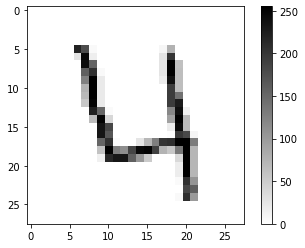

In [ ]:
# Let's make some beautiful plots.
digit_array = mnist_train.loc[3, "pixel0":]
arr = np.array(digit_array) 

#.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[3, "label"]))

# PCA Implementation



In [ ]:
from sklearn.preprocessing import StandardScaler
#standardize
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(mnist_train_data)
standardized_data.shape

(42000, 784)

In [ ]:
#covariance
cov_matrix = np.matmul(standardized_data.T, standardized_data)
cov_matrix.shape

(784, 784)

In [ ]:
from scipy.linalg import eigh
#eigenvalues and vectors
lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
vectors.shape

(784, 2)

In [ ]:
vectors = vectors.T
vectors.shape

(2, 784)

In [ ]:
#new unit vectors
new_coordinates = np.matmul(vectors, standardized_data.T)
print(new_coordinates.shape)
new_coordinates = np.vstack((new_coordinates, mnist_train_label)).T

(2, 42000)


In [ ]:
df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
df_new.head()


,f1,f2,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


KNN (Origional Data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size = 0.15, random_state= 42)
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

KNN (Reduced Data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data_reduced, train_label, test_size = 0.15, random_state= 42)
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

Reconstruction & Mean Absolute Error

In [ ]:
train_data_reconstructed = np.dot(feature_vector_train, train_data_reduced.transpose()).transpose() + train_mean
test_data_reconstructed = np.dot(feature_vector_test, test_data_reduced.transpose()).transpose() + test_mean

mae_train = mean_absolute_error(train_data, train_data_reconstructed)
mae_test = mean_absolute_error(test_data, test_data_reconstructed)
print('MAE Train: ', mae_train)
print('MAE Test: ', mae_test)